In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = 'https://covid.ourworldindata.org/data/owid-covid-data.json'

In [3]:
df = pd.read_json(file)

In [4]:
df

,AFG,OWID_AFR,ALB,DZA,AND,AGO,AIA,ATG,ARG,ARM,...,UZB,VUT,VAT,VEN,VNM,WLF,OWID_WRL,YEM,ZMB,ZWE
continent,Asia,NaN,Europe,Africa,Europe,Africa,North America,North America,South America,Asia,...,Asia,Oceania,Europe,South America,Asia,Oceania,NaN,Asia,Africa,Africa
location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
population,3.98354e+07,1.37349e+09,2.87293e+06,4.46166e+07,77354,3.39336e+07,15125,98728,4.56058e+07,2.96813e+06,...,3.39358e+07,314464,812,2.87049e+07,9.81688e+07,11094,7.87497e+09,3.04906e+07,1.89207e+07,1.50922e+07
population_density,54.422,NaN,104.871,17.348,163.755,23.89,NaN,231.845,16.177,102.931,...,76.134,22.662,NaN,36.253,308.127,NaN,58.045,53.508,22.995,42.729
median_age,18.6,NaN,38,29.1,NaN,16.8,NaN,32.1,31.9,35.7,...,28.2,23.1,NaN,29,32.6,NaN,30.9,20.3,17.7,19.6
aged_65_older,2.581,NaN,13.188,6.211,NaN,2.405,NaN,6.933,11.198,11.232,...,4.469,4.394,NaN,6.614,7.15,NaN,8.696,2.922,2.48,2.822
aged_70_older,1.337,NaN,8.643,3.857,NaN,1.362,NaN,4.631,7.441,7.571,...,2.873,2.62,NaN,3.915,4.718,NaN,5.355,1.583,1.542,1.882
gdp_per_capita,1803.99,NaN,11803.4,13913.8,NaN,5819.49,NaN,21490.9,18933.9,8787.58,...,6253.1,2921.91,NaN,16745,6171.88,NaN,15469.2,1479.15,3689.25,1899.78
cardiovasc_death_rate,597.029,NaN,304.195,278.364,109.135,276.045,NaN,191.511,191.032,341.01,...,724.417,546.3,NaN,204.85,245.465,NaN,233.07,495.003,234.499,307.846
diabetes_prevalence,9.59,NaN,10.08,6.73,7.97,3.94,NaN,13.17,5.5,7.11,...,7.57,12.02,NaN,6.47,6,NaN,8.51,5.35,3.94,1.82


In [5]:
df.columns

Index(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM',
       ...
       'UZB', 'VUT', 'VAT', 'VEN', 'VNM', 'WLF', 'OWID_WRL', 'YEM', 'ZMB',
       'ZWE'],
      dtype='object', length=233)

In [6]:
df.LKA

continent                                                                  Asia
location                                                              Sri Lanka
population                                                          2.14973e+07
population_density                                                      341.955
median_age                                                                 34.1
aged_65_older                                                            10.069
aged_70_older                                                             5.331
gdp_per_capita                                                          11669.1
cardiovasc_death_rate                                                   197.093
diabetes_prevalence                                                       10.68
handwashing_facilities                                                      NaN
hospital_beds_per_thousand                                                  3.6
life_expectancy                         

In [7]:
temp=df.LKA[14][0]

In [8]:
temp

{'date': '2020-01-27',
 'total_cases': 1.0,
 'new_cases': 1.0,
 'total_cases_per_million': 0.047,
 'new_cases_per_million': 0.047,
 'stringency_index': 2.7800000000000002}

In [9]:
temp['date']

'2020-01-27'

In [10]:
temp['new_cases']

1.0

In [11]:
temp['total_cases']

1.0

In [12]:
from datetime import datetime
format = "%Y-%m-%d"
datestr = temp['date']
date = datetime.strptime(datestr, format).date()
date


datetime.date(2020, 1, 27)

In [13]:
date=[]
new_cases=[]
total_cases=[]
total_cases_permil=[]
new_cases_permil=[]
for n in range(len(df.LKA[14])):
    date.append(df.LKA[14][n]['date'])
    new_cases.append(df.LKA[14][n]['new_cases'])
    total_cases.append(df.LKA[14][n]['total_cases'])
    total_cases_permil.append(df.LKA[14][n]['total_cases_per_million'])
    new_cases_permil.append(df.LKA[14][n]['new_cases_per_million'])
    
    
df_lk = pd.DataFrame()
df_lk['date'] = date
df_lk['new_cases'] = new_cases
df_lk['total_cases'] = total_cases
df_lk['total_cases_permil'] = total_cases_permil
df_lk['new_cases_permil'] = new_cases_permil

df_lk.index=pd.to_datetime(df_lk['date'])

plot_index=[]
for date1 in df_lk.index:
    if date1.weekday()==0:
        plot_index.append(date1)

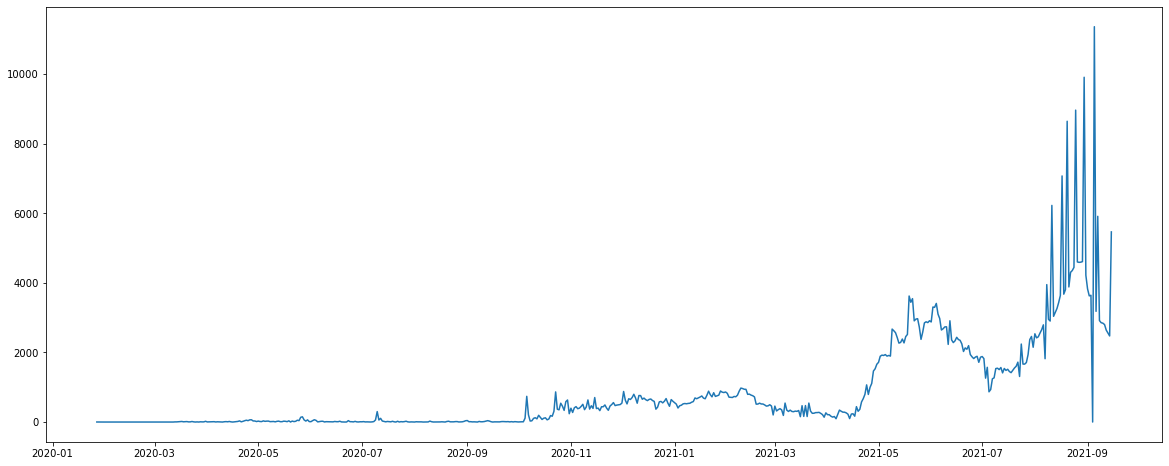

In [14]:
plt.figure(figsize=(20,8))
plt.plot(df_lk['new_cases'])

Text(0.5, 1.0, '7-Day rolling Average (New Cases)')

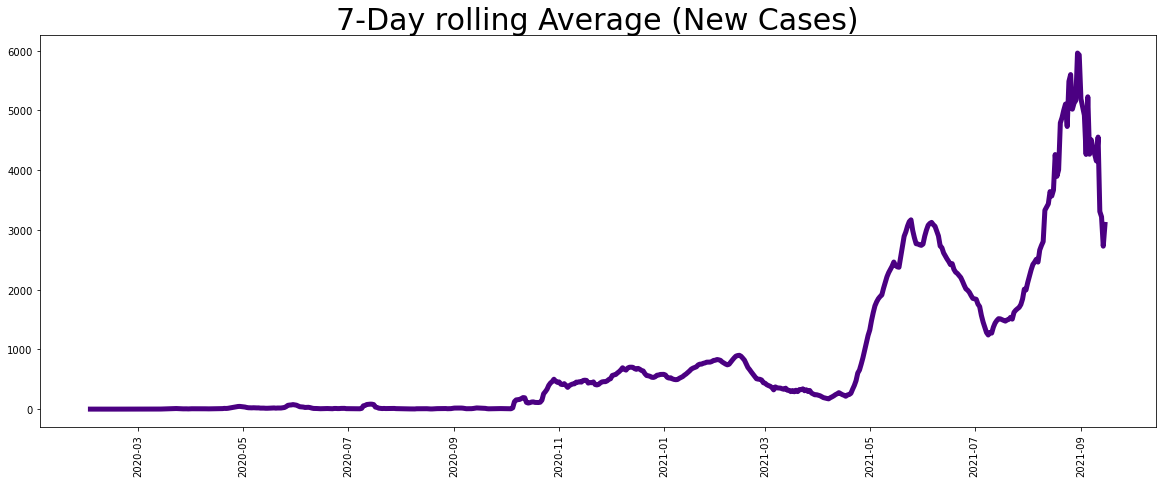

In [15]:
weekly_mean=df_lk['new_cases'].rolling(7).mean()
plt.figure(figsize=(20,8))
plt.gcf().autofmt_xdate()

plt.xticks( rotation=90, fontsize=10,fontweight=30)
plt.plot(weekly_mean, color='#4b0082', linewidth=5)
#plt.xticks(rotation = 45)

plt.title("7-Day rolling Average (New Cases)",fontsize=30,color='black')


In [16]:
from datetime import date, timedelta
import datetime
dstart = df_lk.index.min()
dend = df_lk.index.max()
# this will return all sundays between start-end dates.
days = [dstart + timedelta(days=x) for x in range((dend-dstart).days + 1) if (dstart + timedelta(days=x)).weekday() == 6]
days = pd.to_datetime(days)
days


DatetimeIndex(['2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23',
               '2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22',
               '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19',
               '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17',
               '2020-05-24', '2020-05-31', '2020-06-07', '2020-06-14',
               '2020-06-21', '2020-06-28', '2020-07-05', '2020-07-12',
               '2020-07-19', '2020-07-26', '2020-08-02', '2020-08-09',
               '2020-08-16', '2020-08-23', '2020-08-30', '2020-09-06',
               '2020-09-13', '2020-09-20', '2020-09-27', '2020-10-04',
               '2020-10-11', '2020-10-18', '2020-10-25', '2020-11-01',
               '2020-11-08', '2020-11-15', '2020-11-22', '2020-11-29',
               '2020-12-06', '2020-12-13', '2020-12-20', '2020-12-27',
               '2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21',
      

Text(0.5, 1.0, 'Total Cases per million)')

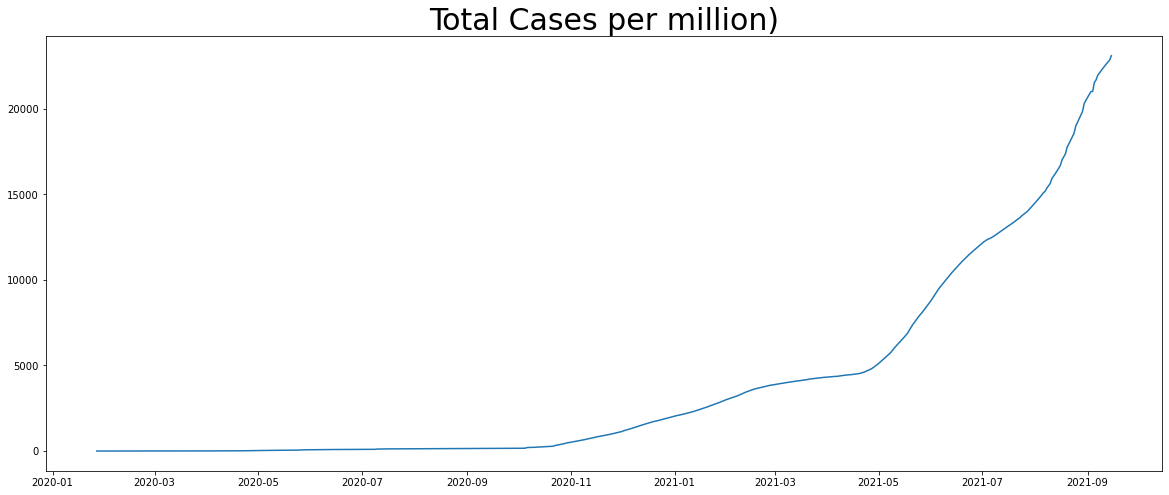

In [17]:

plt.figure(figsize=(20,8))
plt.plot(df_lk['total_cases_permil'])
plt.title("Total Cases per million)",fontsize=30,color='black')

Text(0.5, 1.0, 'Total Cases)')

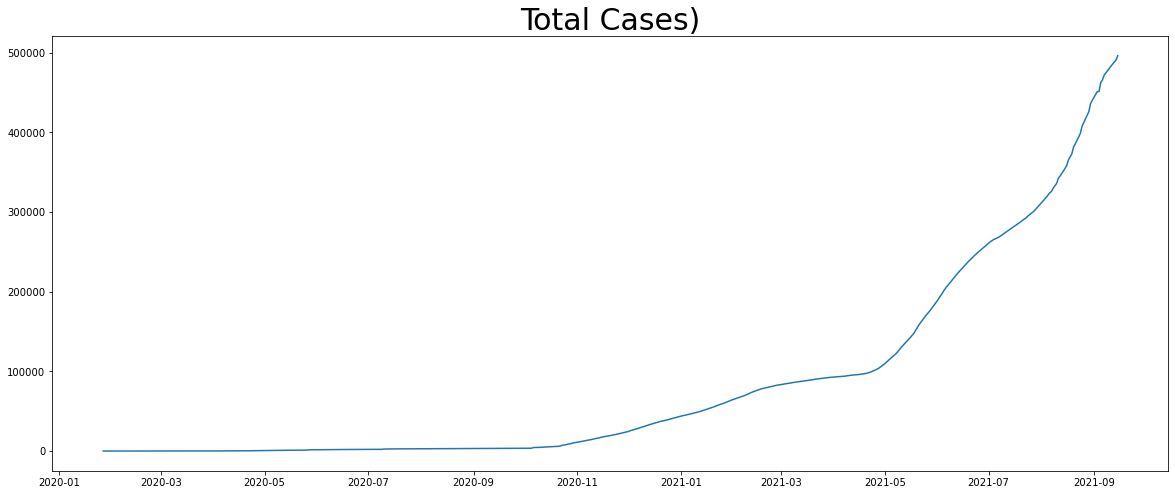

In [18]:
plt.figure(figsize=(20,8))
plt.plot(df_lk['total_cases'])
plt.title("Total Cases)",fontsize=30,color='black')

In [19]:
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

P=p=0
D=d=0
Q=q=0
aic=10000

for p in range(0,6,1): 
    for d in range(0,6,1):
        for q in range(0,6,1):
            #print(p)
            try:
                #print(p)
                model1 = ARIMA(df_lk['new_cases'] , order=(p,1,2))
                model1_fit = model1.fit(disp=0)
                #print(f'p= {p}, d={d}, q={q}, aic= {model1_fit.aic}')
                if aic > model1_fit.aic:
                    aic = model1_fit.aic
                    
                    P=p
                    D=d
                    Q=q
            except:
                pass
    

print(f'p= {P}, d={D}, q={Q}, aic= {aic}')


p= 3, d=0, q=0, aic= 9301.262250160744


In [20]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

model= ARIMA(df_lk['new_cases'] , order=(P,D,Q))
model_fit = model.fit(disp=0)

#fitted, confint = model.predict(n_periods=5, return_conf_int=True)

n_days = 50
fc, se, conf = model_fit.forecast(n_days,alpha=0.05) ##95% conf. Level, next 5 days

index_of_fc = pd.date_range(df_lk.index[-1], periods = n_days, freq='D')

fitted_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(conf[:, 0], index=index_of_fc)
upper_series = pd.Series(conf[:, 1], index=index_of_fc)

pred=model_fit.predict() # model pred for the past 

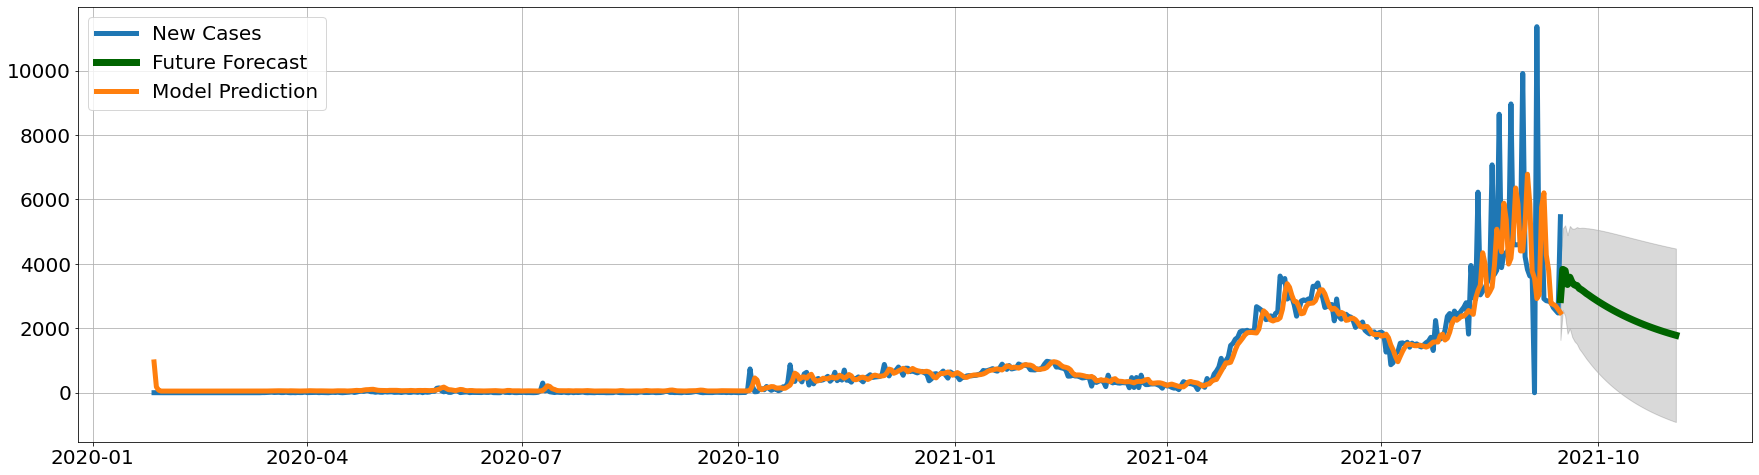

In [21]:
#%matplotlib widget
plt.figure(figsize=(30,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(df_lk['new_cases'],linewidth=5, label='New Cases')
plt.plot(fitted_series, color='darkgreen', linewidth=7,label='Future Forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.plot(pred, linewidth=5, label='Model Prediction')
plt.legend(loc="upper left",fontsize=20)
plt.grid()